# Heart disease ICU insights and data visualization

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set(palette="pastel")
raw_data = pd.read_csv("heart.csv")

In [92]:
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
raw_data.shape

(303, 14)

In [94]:
#calcolo la media e deviazione standard dei valori di colesterolo
raw_data.chol.describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [95]:
raw_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [96]:
definitions = {"age":"age", "sex":"sex","cp" : "chest_pain_type", 
               "trestbps" : "resting_blood_pressure","chol" : "serum_cholesterol", 
               "fbs":"blood_sugar", "restecg":"resting_electrocardiographic_results", 
               "thalac": "maximum_heart_rate", "exang": "exercise_induced_angina", 
               "oldpeak": "st_depression_induced_by_exercise", 
               "slope": "slope_of_the_peak_exercise_ST_segment", 
               "ca": "number_of_major_vessels_(0-3)_colored_by_flourosopy", 
               "thal": "3=normal_6=fixed_defect_7=reversable_defect", 
               "target": "presence_of_heart_disease"}


In [97]:
#sostituisco i nomi delle colonne con altri più descrittivi dal mio dizionario
raw_data.columns = definitions.values()

#elimino le colonne che non mi interessano
data = raw_data.drop(["st_depression_induced_by_exercise","slope_of_the_peak_exercise_ST_segment", 
                      "number_of_major_vessels_(0-3)_colored_by_flourosopy", 
                      "3=normal_6=fixed_defect_7=reversable_defect", 
                      "resting_electrocardiographic_results", "exercise_induced_angina", "chest_pain_type"], axis=1)
data

,age,sex,resting_blood_pressure,serum_cholesterol,blood_sugar,maximum_heart_rate,presence_of_heart_disease
0,63,1,145,233,1,150,1
1,37,1,130,250,0,187,1
2,41,0,130,204,0,172,1
3,56,1,120,236,0,178,1
4,57,0,120,354,0,163,1
...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,0
299,45,1,110,264,0,132,0
300,68,1,144,193,1,141,0
301,57,1,130,131,0,115,0


In [98]:
#conto i partecipanti di ciascun sesso
partecipanti_per_sesso = data.sex.value_counts()
partecipanti_per_sesso

1    207
0     96
Name: sex, dtype: int64

In [99]:
#conto l'incidenza di malattia cardiaca per ciascun sesso aggregando i dati
malattia_per_sesso = data.groupby("sex")["presence_of_heart_disease"]
malattia_per_sesso.value_counts(normalize=True)

sex  presence_of_heart_disease
0    1                            0.750000
     0                            0.250000
1    0                            0.550725
     1                            0.449275
Name: presence_of_heart_disease, dtype: float64

In [100]:
#creo un dataset di sole donne
donne = data[data.sex == 0]

In [101]:
#creo  un dataset di soli uomini
uomini = data[data.sex == 1]

In [102]:
#creo un dataset di ultrasessantenni
terza_età = data[data.age > 60]
terza_età.head()

,age,sex,resting_blood_pressure,serum_cholesterol,blood_sugar,maximum_heart_rate,presence_of_heart_disease
0,63,1,145,233,1,150,1
13,64,1,110,211,0,144,1
17,66,0,150,226,0,114,1
19,69,0,140,239,0,151,1
23,61,1,150,243,1,137,1


In [103]:
terza_età["presence_of_heart_disease"].sum()
#output = 35 (su 79 rows totali, cioè 0.44%)

35

In [104]:
#creo un dataset con due condizioni che devono essere soddisfatte contemporaneamente: sesso maschile ed età oltre i 60 anni
uomini_terza_età = (data.sex == 1)& (data.age > 60)
data[uomini_terza_età].head()

,age,sex,resting_blood_pressure,serum_cholesterol,blood_sugar,maximum_heart_rate,presence_of_heart_disease
0,63,1,145,233,1,150,1
13,64,1,110,211,0,144,1
23,61,1,150,243,1,137,1
31,65,1,120,177,0,140,1
51,66,1,120,302,0,151,1


In [105]:
#trovo gli indici degli ultrasessantenni con una pressione sotto i 120
np.where(terza_età.resting_blood_pressure < 120)

(array([ 1, 13, 15, 16, 28, 32, 44, 65, 68, 69], dtype=int64),)

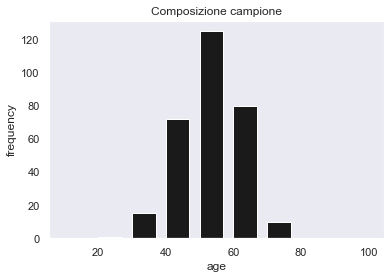

In [54]:
bins = [10,20,30,40,50,60,70,80,90,100]
plt.hist(data.age,bins, color="k", width=7);
plt.title("Composizione campione");
plt.xlabel("age");
plt.ylabel("frequency");
plt.grid(False)


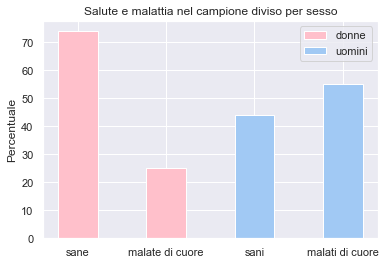

In [55]:
#creo un grafico a barre che rappresenti le percentuali di malattia per ciascun sesso a partire da questi dati:
#  sex  presence_of_heart_disease    percentage
#  F    1                            0.742268
#       0                            0.257732
#  M    0                            0.550725
#       1                            0.449275
#credo che 0 heart disease significhi malattia e 1 salute, controintuitivo. Rappresento i dati con questa interpretazione
#faccio grafico a barre e non istogramma perchè non ho i valori (percentuali) in un dataframe

malattia_donna = ["sane","malate di cuore"]
malattia_uomo = ["sani","malati di cuore"]
valori_donna = [74,25]
valori_uomo= [44,55]
plt.bar(malattia_donna, valori_donna, width=0.45, color = "pink", label = "donne");
plt.bar(malattia_uomo, valori_uomo, width=0.45, color = "b", label ="uomini")
plt.title("Salute e malattia nel campione diviso per sesso");
plt.ylabel("Percentuale");
plt.legend();


In [56]:
#trovo gli indici dei pazienti con colesterolo normale
colesterolo = data["serum_cholesterol"]
np.where(colesterolo<200)

(array([  5,   8,   9,  24,  27,  29,  30,  31,  35,  53,  58,  62,  65,
         87,  94, 102, 104, 111, 117, 124, 128, 136, 144, 149, 151, 155,
        157, 162, 163, 164, 175, 178, 189, 192, 194, 200, 204, 208, 209,
        225, 227, 244, 267, 279, 294, 295, 296, 297, 300, 301], dtype=int64),)

In [57]:
#creo un dataframe che continene i pazienti con colesterolo normale
colesterolo_normale = data.iloc[[5,   8,   9,  24,  27,  29,  30,  31,  35,  53,  58,  62,  65,
         87,  94, 102, 104, 111, 117, 124, 128, 136, 144, 149, 151, 155,
        157, 162, 163, 164, 175, 178, 189, 192, 194, 200, 204, 208, 209,
        225, 227, 244, 267, 279, 294, 295, 296, 297, 300, 301]]

In [58]:
#chiedo le percentuali di malattia cardiaca nei pazienti con colesterolo normale
#credo che 0 heart disease significhi malattia e 1 salute, controintuitivo
colesterolo_normale.presence_of_heart_disease.value_counts(normalize=True)

1    0.6
0    0.4
Name: presence_of_heart_disease, dtype: float64

In [59]:
#trovo gli indici dei pazienti con colesterolo alto
np.where(colesterolo>=200)

(array([  0,   1,   2,   3,   4,   6,   7,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  28,  32,  33,
         34,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
         48,  49,  50,  51,  52,  54,  55,  56,  57,  59,  60,  61,  63,
         64,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  88,  89,  90,  91,
         92,  93,  95,  96,  97,  98,  99, 100, 101, 103, 105, 106, 107,
        108, 109, 110, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122,
        123, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 137, 138,
        139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 152, 153, 154,
        156, 158, 159, 160, 161, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187,
        188, 190, 191, 193, 195, 196, 197, 198, 199, 201, 202, 203, 205,
        206, 207, 210, 211, 212, 213, 214, 215, 216

In [60]:
#creo un dataframe di pazienti con colesterolo alto
colesterolo_alto = data.iloc[[0,   1,   2,   3,   4,   6,   7,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  28,  32,  33,
         34,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
         48,  49,  50,  51,  52,  54,  55,  56,  57,  59,  60,  61,  63,
         64,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  88,  89,  90,  91,
         92,  93,  95,  96,  97,  98,  99, 100, 101, 103, 105, 106, 107,
        108, 109, 110, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122,
        123, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 137, 138,
        139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 152, 153, 154,
        156, 158, 159, 160, 161, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187,
        188, 190, 191, 193, 195, 196, 197, 198, 199, 201, 202, 203, 205,
        206, 207, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
        221, 222, 223, 224, 226, 228, 229, 230, 231, 232, 233, 234, 235,
        236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 249,
        250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
        263, 264, 265, 266, 268, 269, 270, 271, 272, 273, 274, 275, 276,
        277, 278, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
        291, 292, 293, 298, 299, 302]]

In [61]:
#chiedo la percentuale di malattia cardiaca nei pazienti con colesterolo alto
#credo che 0 heart disease significhi malattia e 1 salute, controintuitivo
colesterolo_alto.presence_of_heart_disease.value_counts(normalize=True)

1    0.533597
0    0.466403
Name: presence_of_heart_disease, dtype: float64

In [62]:
#metto il segno meno perchè credo che 0 heart disease significhi malattia e 1 salute, controintuitivo
(data.serum_cholesterol).corr(-data.presence_of_heart_disease)
#correlazione debole

0.08523910513756905

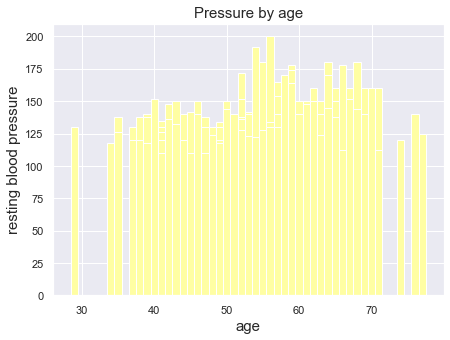

In [63]:
#creo un grafico a barre che mostra la pressione per ogni età
#come faccio a non fare sovrapporre le barre di diversi pazienti della stessa età? 
#posso creare bins per un grafico a barre invece che per un istogramma?
plt.figure(figsize=(7,5))
plt.bar("age", "resting_blood_pressure", data=data, color= "y", width=1);
plt.title("Pressure by age", size= 15);
plt.xlabel("age", size=15);
plt.ylabel("resting blood pressure", size=15);

-0.009939838642698208

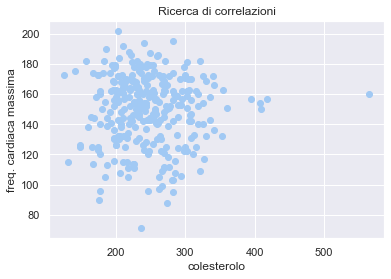

In [64]:
#cerchiamo se c'è una relazione tra colesterolo e freq.cardiaca massima con uno scatterplot e matematicamente
plt.scatter("serum_cholesterol", "maximum_heart_rate", data=data);
plt.xlabel("colesterolo");
plt.ylabel("freq. cardiaca massima");
plt.title("Ricerca di correlazioni");

data.serum_cholesterol.corr(data.maximum_heart_rate)
#non c'è correlazione e si vede

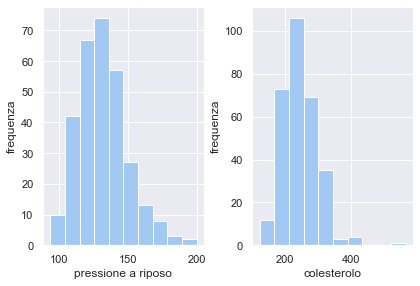

In [90]:
#composizione del campione per quanto riguarda pressione e colesterolo, fatto con i subplots
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.tight_layout()
ax1.hist([data.resting_blood_pressure]);
ax2.hist([data.serum_cholesterol]);
ax1.set_xlabel("pressione a riposo");
ax2.set_xlabel("colesterolo");
ax1.set_ylabel("frequenza");
ax2.set_ylabel("frequenza");
